**Work with NOISY images**

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from numpy import loadtxt
import pandas as pd
import os
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.visualization import simple_norm
import tensorflow as tf

In [ ]:
from google.colab import auth
auth.authenticate_user()
!gcloud config set project sfhs-333010

Updated property [core/project].


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k
OK
55 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.38.0).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [ ]:
!mkdir data
!gcsfuse --implicit-dirs tng100 data

mkdir: cannot create directory ‘data’: File exists
2021/12/07 14:49:15.544153 Start gcsfuse/0.38.0 (Go version go1.17.3) for app "" using mount point: /content/data
2021/12/07 14:49:15.558902 Opening GCS connection...
2021/12/07 14:49:15.981484 Mounting file system "tng100"...
2021/12/07 14:49:15.985176 File system has been successfully mounted.


In [ ]:
# load catalogs
cat_path = "/content/data/phot_TNG100_dylan_143.csv"
phot_cat = pd.read_csv(cat_path)
sfh_path = "/content/data/cats_SFH/"
wl = loadtxt('/content/data/wl.csv', delimiter=',')/10**4
"""
#index pandas table
shids = phot_cat['subhaloIDs']
phot_cat.set_index("subhaloIDs", inplace=True)
phot_cat.head()

#plot figures
fig, axs = plt.subplots(10, 3)
fig.set_size_inches(18, 30)
fig.suptitle("TNG100, no dust", fontsize=16)
for index in range(10):
    sh = int(shids[index+random.randint(0,high=len(shids)-20)])
    obj=phot_cat.loc[sh][:]
    #apparent mags
    app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc
    flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy
    axs[index, 0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)
    axs[index, 0].set_xlabel("wavelength [$\mu m$]")
    axs[index, 0].set_xscale('log')
    try:
      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
    axs[index, 0].set_ylabel("$\log(f)$ [Jy]")
    axs[index, 1].set_xlabel("Time")
    axs[index, 1].set_ylabel("SFR")
    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)
    axs[index, 2].plot(sfh.time,np.log10(sfh.Mstar_Half)+10)
    axs[index, 2].set_xlabel("Time")
    axs[index, 2].set_ylabel("Mstar")
plt.savefig("/content/data/TNG100_examples.pdf")"""

'\n#index pandas table\nshids = phot_cat[\'subhaloIDs\']\nphot_cat.set_index("subhaloIDs", inplace=True)\nphot_cat.head()\n\n#plot figures\nfig, axs = plt.subplots(10, 3)\nfig.set_size_inches(18, 30)\nfig.suptitle("TNG100, no dust", fontsize=16)\nfor index in range(10):\n    sh = int(shids[index+random.randint(0,high=len(shids)-20)])\n    obj=phot_cat.loc[sh][:]\n    #apparent mags\n    app_mag = obj.values+5*(np.log10(20e6)-1) #assume at 20pc\n    flux = 10**(.4*(-app_mag[np.array(wl)<10**3]+8.90)) #convert to Jy\n    axs[index, 0].scatter(np.array(wl)[np.array(wl)<10**3],np.log10(flux),s=10)\n    axs[index, 0].set_xlabel("wavelength [$\\mu m$]")\n    axs[index, 0].set_xscale(\'log\')\n    try:\n      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")\n    except:\n      continue  \n    axs[index, 0].set_ylabel("$\\log(f)$ [Jy]")\n    axs[index, 1].set_xlabel("Time")\n    axs[index, 1].set_ylabel("SFR")\n    axs[index, 1].plot(sfh.time,sfh.SFR_halfRad)\n    axs[index

**List the NOISY files**

In [ ]:
print("Number of files in the g-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/g/")))
print("Number of files in the i-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/i/")))
print("Number of files in the r-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/r/")))
print("Number of files in the z-band",len(os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/z/")))

Number of files in the g-band 11362
Number of files in the i-band 11366
Number of files in the r-band 11372
Number of files in the z-band 11376


In [ ]:
g_band=os.listdir("/content/data/images/TNG100/sdss/sn99/Outputs/g/")

In [ ]:
g_band[1]

In [ ]:
def show_img(image_path,shid,band):
  """
  Displays an image (with original scaling).
  """
  image_file = image_path+'/broadband_'+str(int(shid))+"_FullReal.fits_"+band+"_band_FullReal.fits"
  image_data = fits.getdata(image_file, ext=0)
  fig=plt.figure()
  fig.suptitle("Noiseless image in "+band+" band", fontsize=16)
  plt.imshow(image_data,cmap='gray')
  plt.colorbar()
  return image_data

In [ ]:
band="i"
image_path="/content/data/images/TNG100/sdss/sn99/Outputs/"+band
shid=100
show_img(image_path,shid,band)

Create TF dataset

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
!tfds new tng100_images

**Correspondance snapshot number - time**

In [ ]:
def correspondance_snapshot_zmerger(image_path,cat_snapshot_path,cat_merger_path):
  """
  From the ID of a galaxy in the Illustris TNG100 simulation, returns the time of the corresponding last major merger in lookback time in Gyrs
  Input: illustris_id (int): number of the galaxy in the Illustris TNG100 simulation
         catalog_snapshot(panda dataframe): dataframe containing the number of the snapshot and the corresponding time (including lookback time)
         catalog_merger_time (panda dataframe): dataframe containing the number of the snapshot corresponding to the last major merger, for each galaxy id
  Output: z (float): redshift of the last major merger
  """
  catalog_merger_time=pd.read_csv(cat_merger_path)  
  catalog_snapshot=pd.read_csv(cat_snapshot_path)
  # To adapt to the filenames
  # Here the structure of the filename is the following: 
  #dir="/content/data/images/TNG100/sdss/sn99/Outputs/g/"
  #file: dir+ broadband_number_FullReal.fits_g_band_FullReal.fits where number is the number of the galaxy and g is the band
  illustris_id=int(image_path.split("_")[1])

  num_last_merger=int(catalog_merger_time[catalog_merger_time["Illustris_ID"]==illustris_id]["SnapNumLastMajorMerger"])
  z=float(catalog_snapshot[catalog_snapshot["Snapshot"]==num_last_merger]["Redshift"])
  return z

In [ ]:
def snapshot2lookbackmerger(image_path,cat_snapshot_path,cat_merger_path):
  """
  From the ID of a galaxy in the Illustris TNG100 simulation, returns the time of the corresponding last major merger in lookback time in Gyrs
  Input: illustris_id (int): number of the galaxy in the Illustris TNG100 simulation
         catalog_snapshot(panda dataframe): dataframe containing the number of the snapshot and the corresponding time (including lookback time)
         catalog_merger_time (panda dataframe): dataframe containing the number of the snapshot corresponding to the last major merger, for each galaxy id
  Output: lookback (float): lookback time in Gyrs of the last major merger
  """
  catalog_merger_time=pd.read_csv(cat_merger_path)  
  catalog_snapshot=pd.read_csv(cat_snapshot_path)
  # To adapt to the filenames
  # Here the structure of the filename is the following: 
  #dir="/content/data/images/TNG100/sdss/sn99/Outputs/g/"
  #file: dir+ broadband_number_FullReal.fits_g_band_FullReal.fits where number is the number of the galaxy and g is the band
  illustris_id=int(image_path.split("_")[1])

  num_last_merger=int(catalog_merger_time[catalog_merger_time["Illustris_ID"]==illustris_id]["SnapNumLastMajorMerger"])
  lookback=float(catalog_snapshot[catalog_snapshot["Snapshot"]==num_last_merger]["Lookback"])
  return lookback

In [ ]:
cat_snapshot_path='/content/drive/MyDrive/Colab Notebooks/corresp_snapshot_lookback.csv'
cat_merger_path="/content/data/mergers/TNG100_SDSS_MajorMergers.csv"
image_path="/content/data/images/TNG100/sdss/sn99/Outputs/g/broadband_1_FullReal.fits_g_band_FullReal.fits"

snapshot2lookbackmerger(image_path,cat_snapshot_path,cat_merger_path)

**Combine all the NOISY bands into one**

In [ ]:
def keep_common_filters(img_dir):
  """
  Keeps the number (=id) of the images of galaxies that are available in the four bands g,r,i,z
  Input: img_dir (str): path to the directory containing the noisy images
  Output: gal_id_kept (list of int): list of the IDs of the images available in the four bands
  """
  filters=['g','r','i','z']
  gal_id_all=[]
  for i in range(len(filters)):
    files=os.listdir(img_dir+filters[i])
    #Get the IDs of the galaxies in the NOISY files
    gal_id_all.append([int(file.split("_")[1]) for file in files])
  gal_id_kept=list(set.intersection(*[set(ids) for ids in gal_id_all]))
  return gal_id_kept

In [ ]:
img_dir='/content/data/images/TNG100/sdss/sn99/Outputs/'
gal_ids=keep_common_filters(img_dir)

In [ ]:
def stack_bands(img_dir,gal_id):
  """
  For a given image path and galaxy id, stacks the four bands g,r,i,z into a single image
  Input: img_dir (str): path to the directory containing the noisy images
         gal_id (int): number of the image of galaxy for which you want to stack bands
  Output: im (numpy ndarray): resulting image with the four stacked bands
  """
  filters=['g','r','i','z']
  filenames=[img_dir+filters[i]+"/broadband_"+str(gal_id)+'_FullReal.fits_'+filters[i]+"_band_FullReal.fits" for i in range(len(filters))]
  #Stack the bands together
  im=[fits.getdata(filename, ext=0) for filename in filenames]
  im_size = min([min(i.shape) for i in im])
  im = np.stack([i[:im_size, :im_size] for i in im], axis=-1).astype('float32')
  return im

In [ ]:
img_dir='/content/data/images/TNG100/sdss/sn99/Outputs/'
gal_id=575303
im=stack_bands(img_dir,gal_id)

In [ ]:
print(im.shape,type(im))

In [ ]:
plt.imshow(im[:,:,3])

**Test: load dataset**

In [ ]:
import tng100_images
manual_dir='/content'
dset = tfds.load('tng100_images', split='train')

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/tng100_images/1.0.0.incompleteINJJVN/tng100_images-train.tfrecord


  0%|          | 0/5 [00:00<?, ? examples/s]

Dataset tng100_images downloaded and prepared to /root/tensorflow_datasets/tng100_images/1.0.0. Subsequent calls will reuse this data.


In [10]:
dset

<PrefetchDataset shapes: {image: (128, 128, 4), last_major_merger: (), object_id: ()}, types: {image: tf.float32, last_major_merger: tf.float32, object_id: tf.int32}>

In [12]:
for example in dset.take(2):
  print(example["last_major_merger"])

tf.Tensor(4.079, shape=(), dtype=float32)
tf.Tensor(5.872, shape=(), dtype=float32)


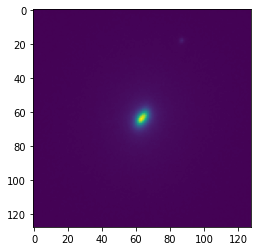

In [16]:
plt.imshow(example['image'][:,:,3])